# EDA AIRBNB

### Paso 1: Definir el problema y carga de datos

Vamos a cargar un conjunto de datos referidos a los alquileres de New York para comprender sus variables y obtener conclusiones.

In [3]:
import pandas as pd

total_data = pd.read_csv("/workspaces/practica/data/raw/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Paso 2: Exploración y limpieza de datos

In [4]:
total_data.shape

(48895, 16)

El dataset contiene 48895 lineas y 16 variables

In [5]:
total_data.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

### Eliminar duplicados

In [6]:
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Observamos nuestra target para ver si tiene valores iguales a 0

In [7]:
total_data = total_data[total_data['price'] != 0]
total_data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


### Paso 3: Análisis de variables univariante

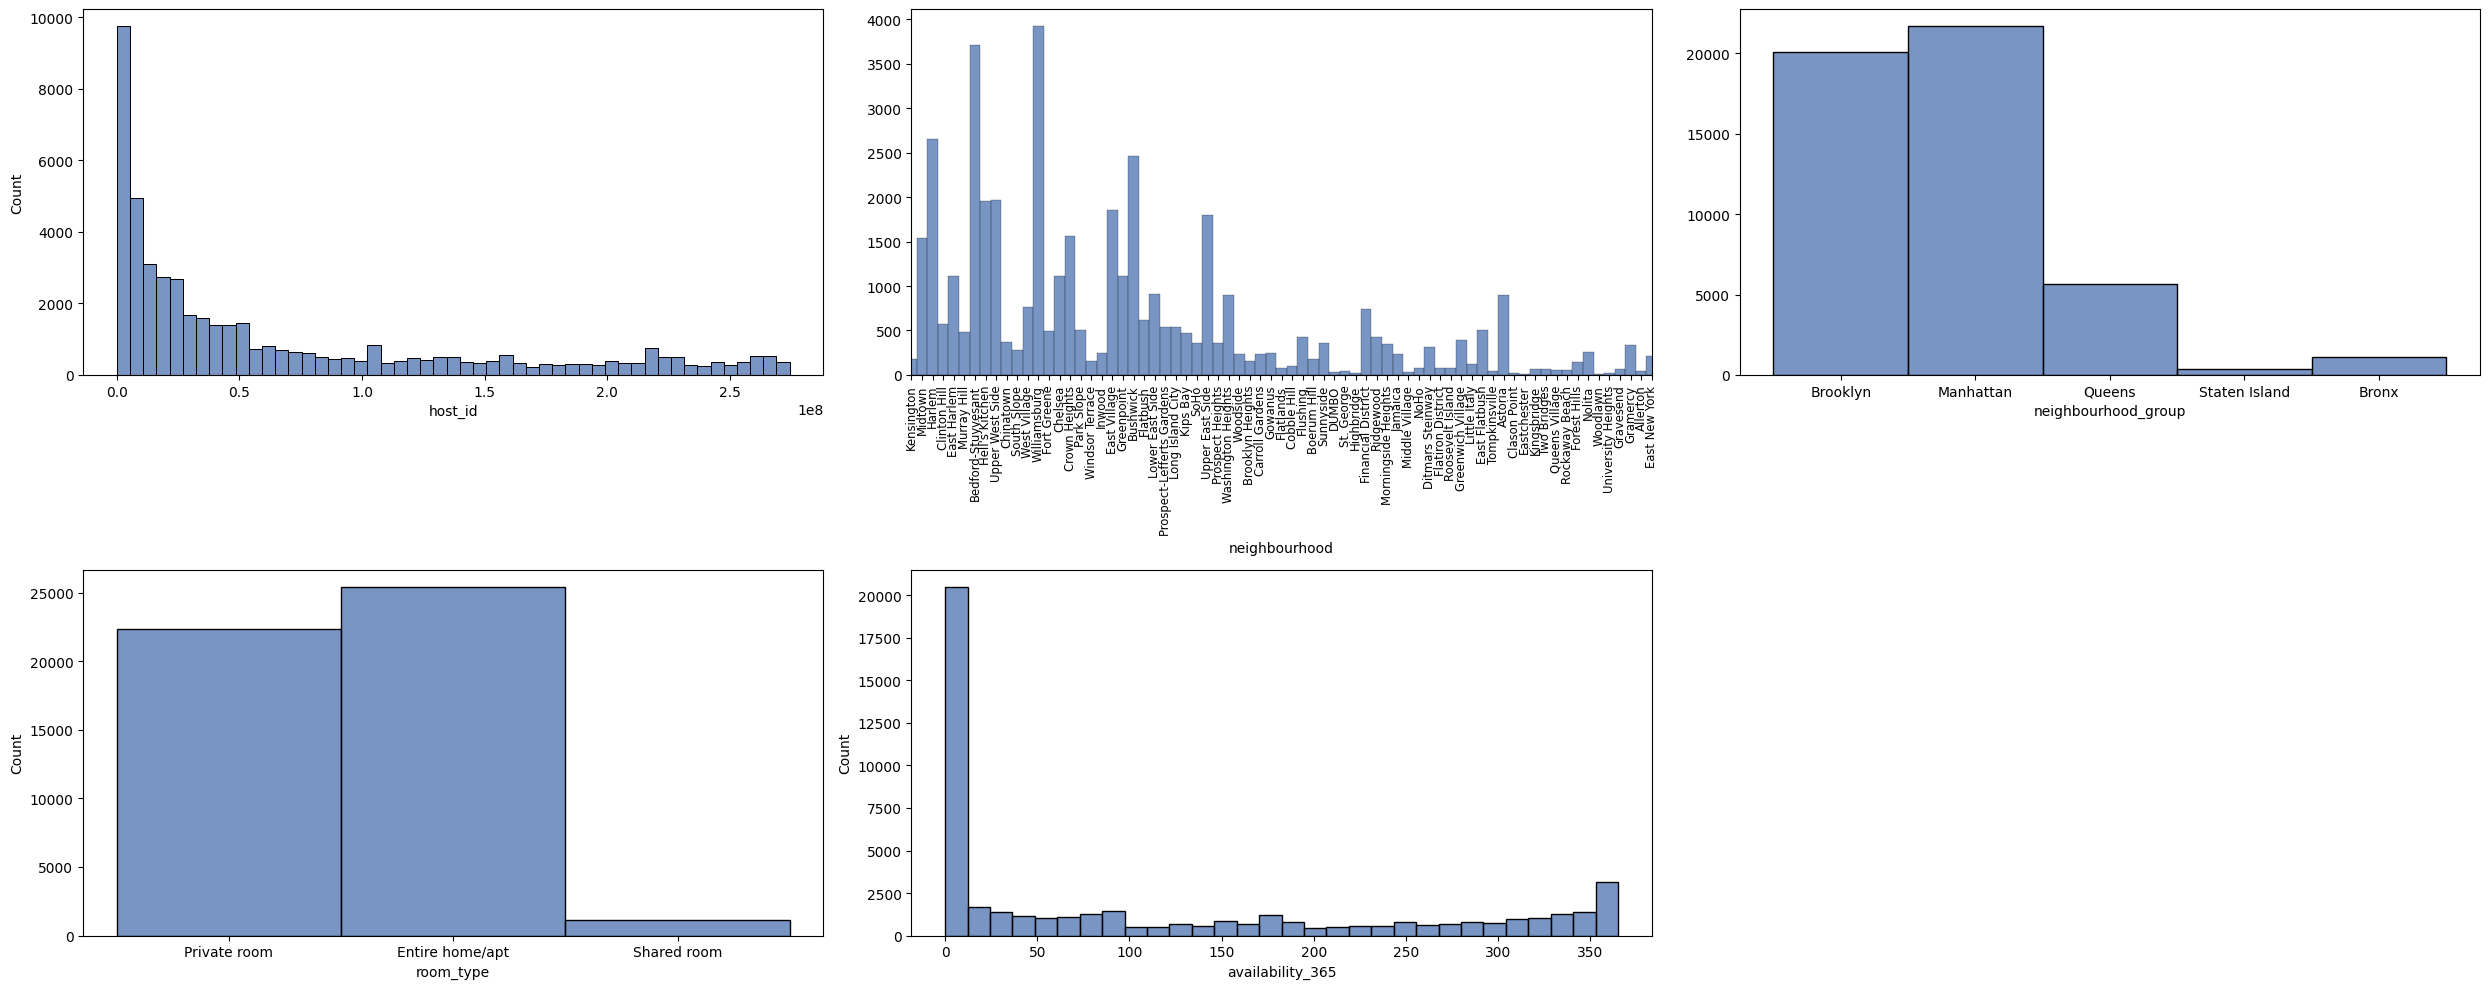

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_palette("deep")

fig, axes = plt.subplots(2, 3, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data = total_data, x='host_id')

sns.histplot(ax=axes[0,1], data = total_data, x='neighbourhood').set(ylabel = None)
axes[0, 1].tick_params(axis='x', rotation=90, labelsize='small')
axes[0, 1].set_xlim(0,70)

sns.histplot(ax=axes[0,2], data = total_data, x='neighbourhood_group').set(ylabel = None)

sns.histplot(ax=axes[1,0], data = total_data, x='room_type')

sns.histplot(ax=axes[1,1], data = total_data, x='availability_365')

fig.delaxes(axes[1, 2])

plt.tight_layout()

plt.show()

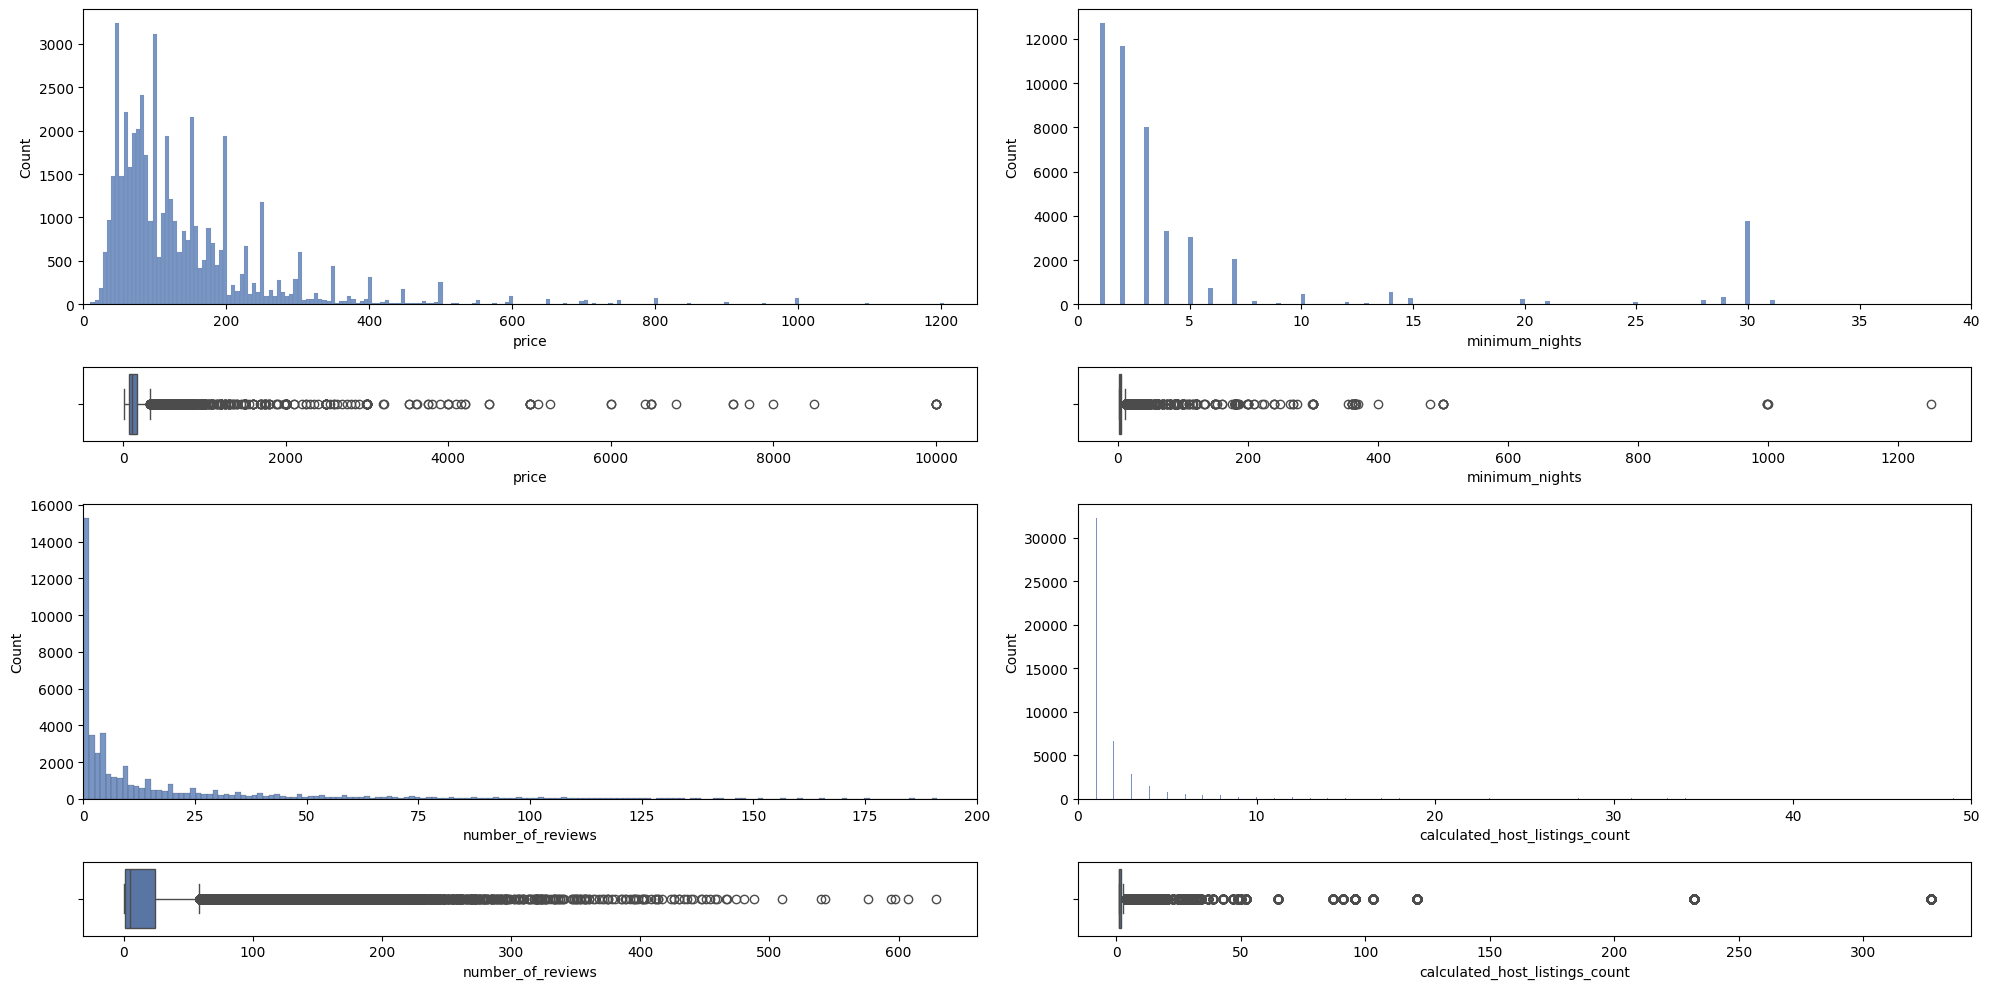

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (20, 10), gridspec_kw = {"height_ratios": [16, 4, 16, 4]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set_xlim(0, 1250)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 40)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews").set_xlim(0, 200)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count").set_xlim(0, 50)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

Análisis numérico-numérico

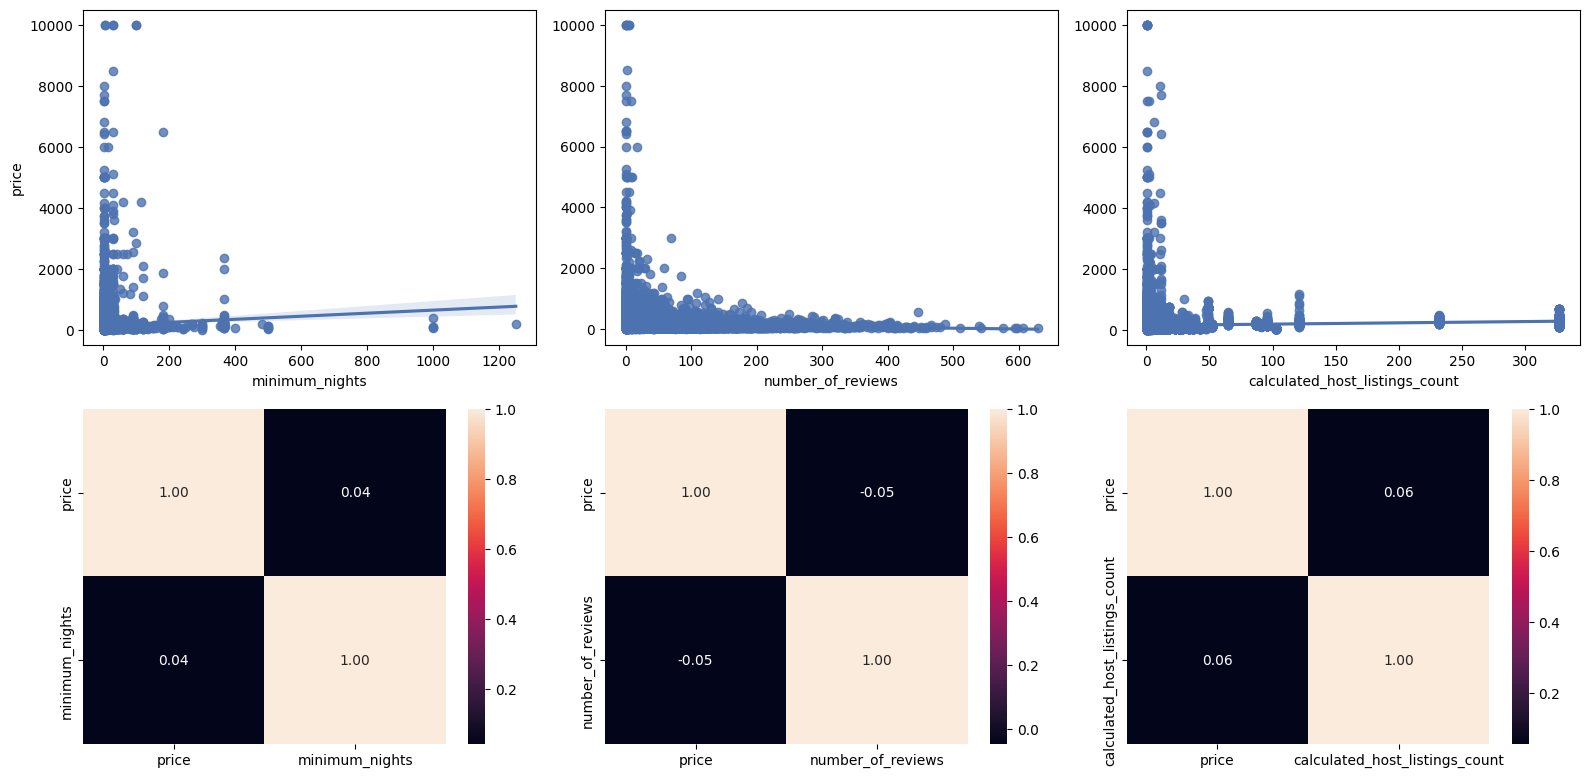

In [10]:
fig, axis = plt.subplots(2, 3, figsize = (16, 8))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = True)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

plt.tight_layout()

plt.show()

Análisis Categórico-Categórico

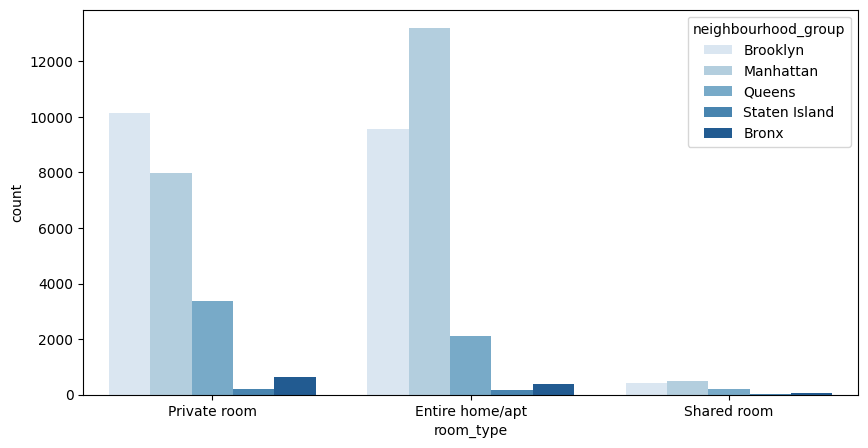

In [11]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group" , palette = 'Blues')

plt.show()

Análisis numérica-categórica:

/tmp/ipykernel_8329/3998018965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data["room_type_f"] = pd.factorize(total_data["room_type"])[0]
/tmp/ipykernel_8329/3998018965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data["neighbourhood_group_f"] = pd.factorize(total_data["neighbourhood_group"])[0]


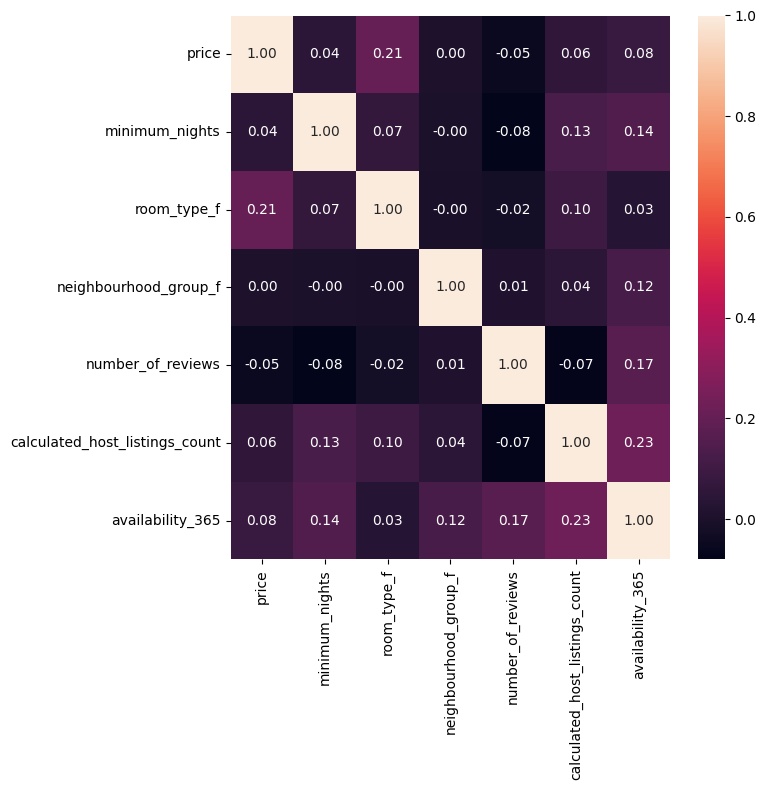

In [12]:
total_data["room_type_f"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group_f"] = pd.factorize(total_data["neighbourhood_group"])[0]

fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(total_data[["price", "minimum_nights", "room_type_f", "neighbourhood_group_f", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Analizamos todas las variables

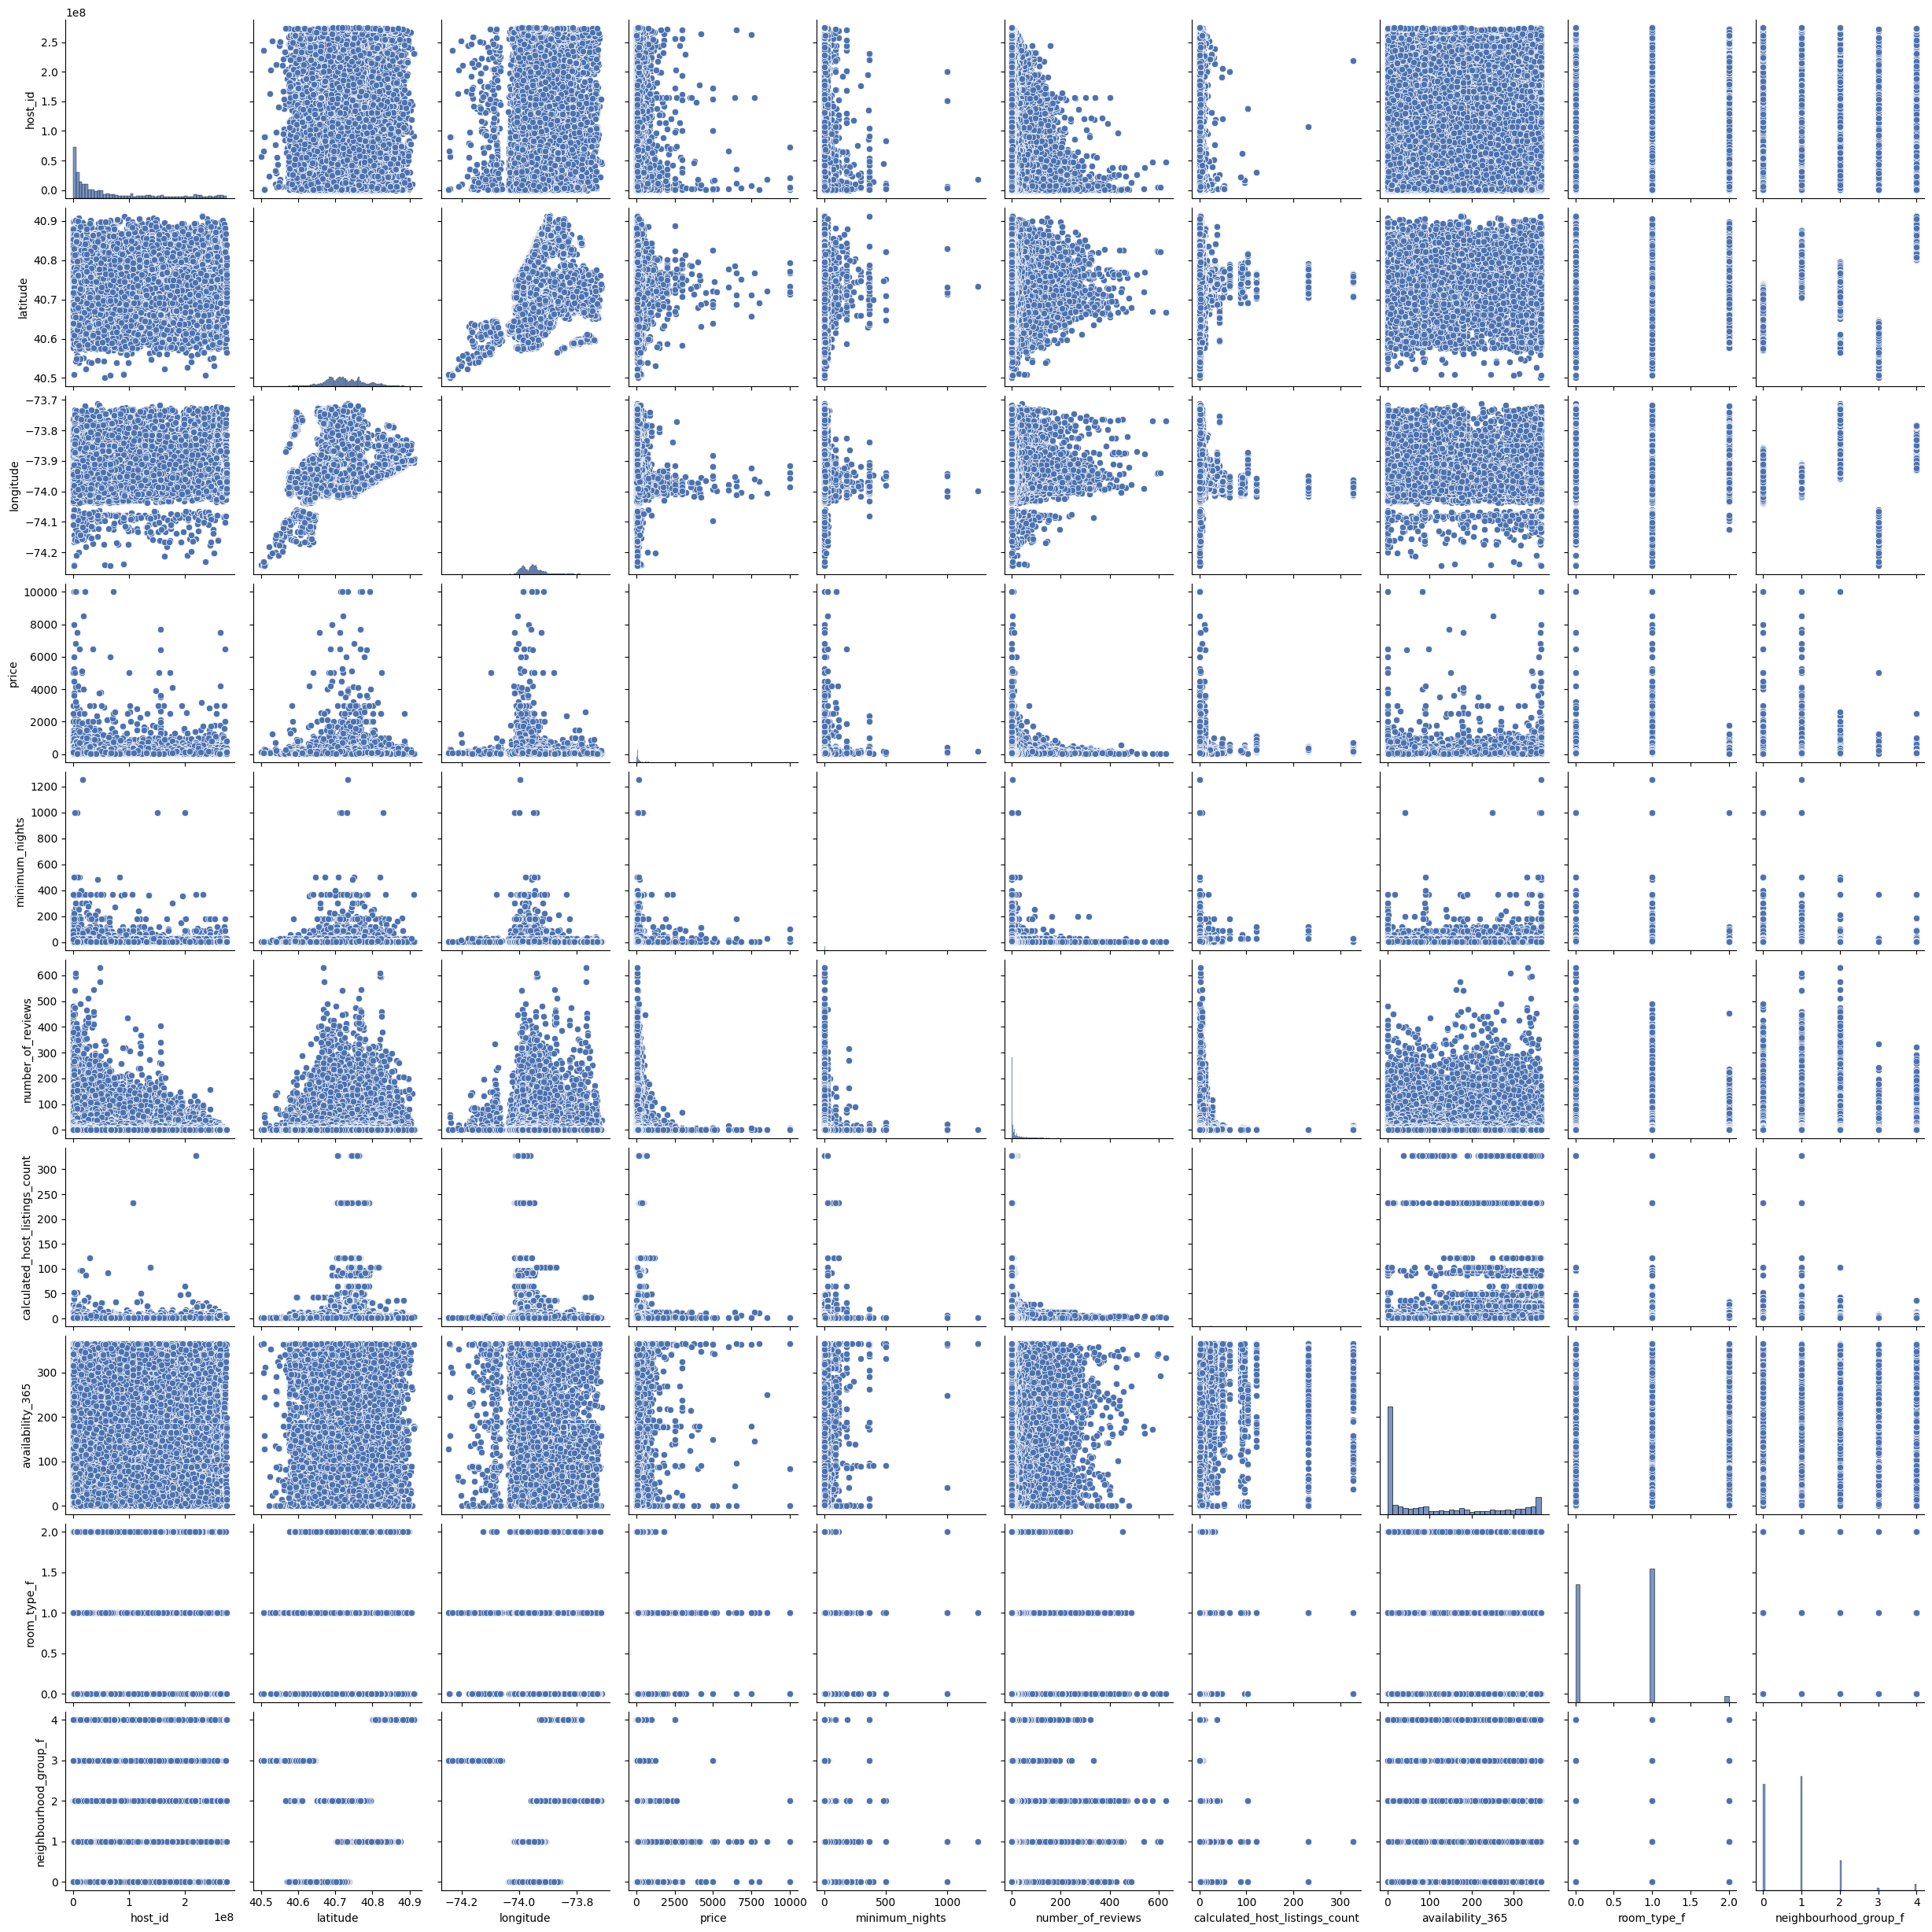

In [13]:
sns.pairplot(data = total_data)

### Paso 5: Feature Engineering

Análisis de Outliers:

In [14]:
total_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_f,neighbourhood_group_f
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,7.144628,112.779498,0.567118,0.786986
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,32.956185,131.627271,0.541183,0.844288
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000


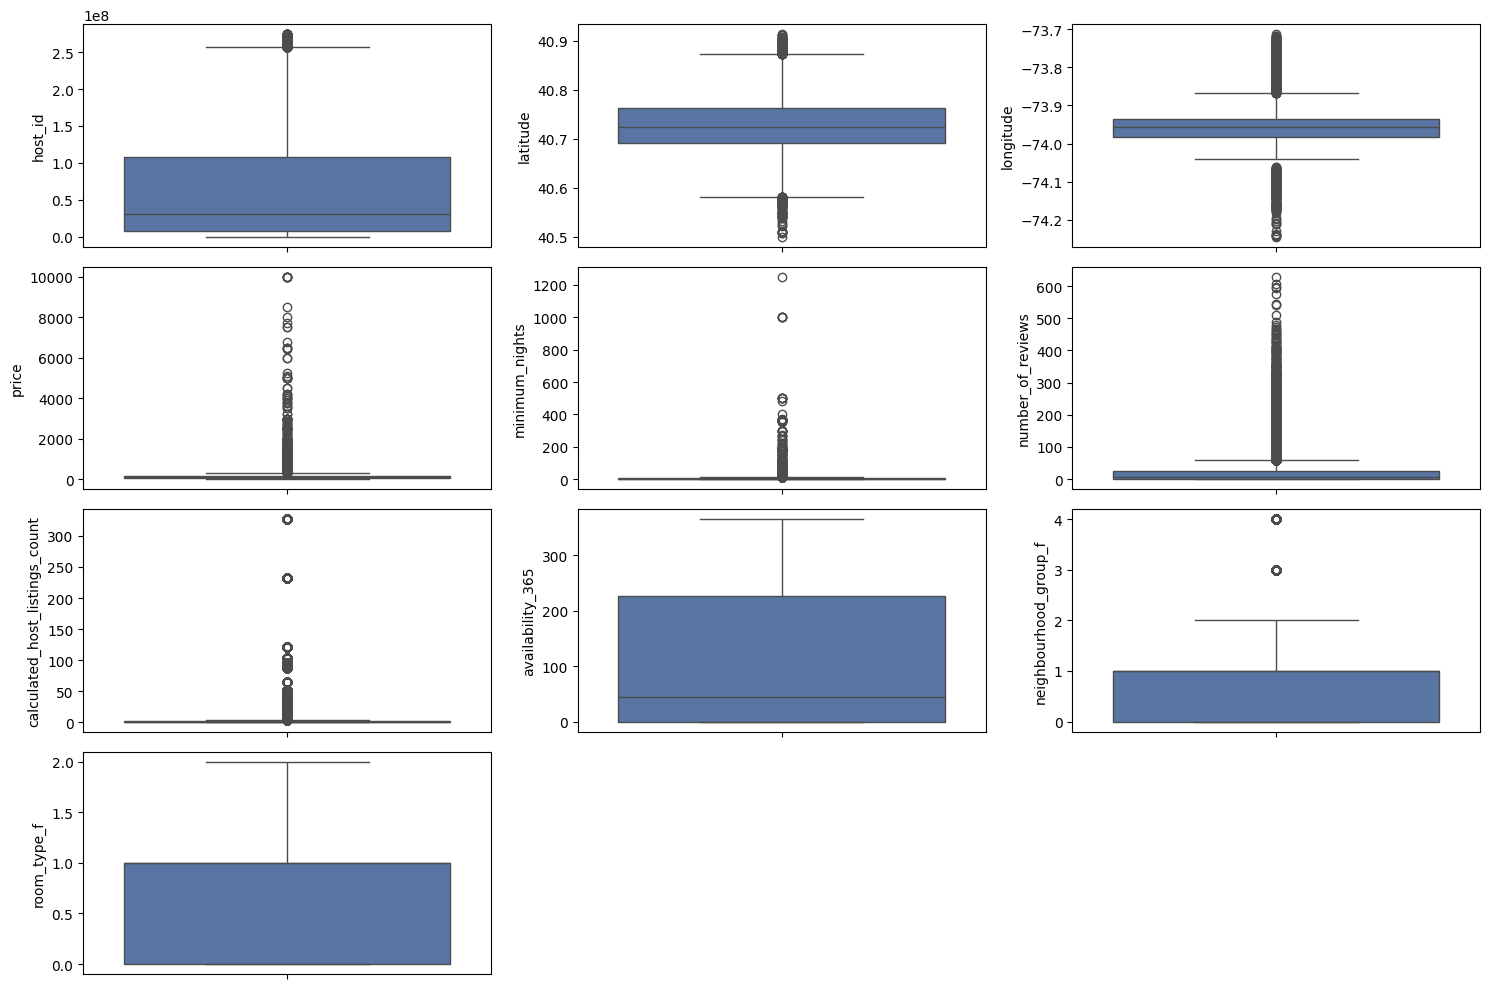

In [15]:
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "host_id")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "latitude")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "longitude")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "price")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[2, 2], data = total_data, y = "neighbourhood_group_f")
sns.boxplot(ax = axis[3, 0], data = total_data, y = "room_type_f")

fig.delaxes(axis[3,1])
fig.delaxes(axis[3,2])

plt.tight_layout()

plt.show()

Outliers en las variables: precio, minimum_nights, number_of_reviews, calculated_host_listings_count.

In [16]:
price_stats = total_data["price"].describe()
price_stats

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [18]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr
print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [19]:
nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [20]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]
upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr
print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(nights_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 11.0 y -5.0, con un rango intercuartílico de 4.0


In [21]:
count_0 = total_data[total_data["minimum_nights"] >= 15].shape[0]
print("count: ", count_0)

total_data = total_data[total_data["minimum_nights"] <= 15]

count:  5898


In [22]:
reviews_stats = total_data["number_of_reviews"].describe()
reviews_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [24]:
reviews_iqr = reviews_stats["75%"] - reviews_stats["25%"]
upper_limit = reviews_stats["75%"] + 1.5 * reviews_iqr
lower_limit = reviews_stats["25%"] - 1.5 * reviews_iqr
print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílo de {round(reviews_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 66.0 y -38.0, con un rango intercuartílo de 26.0


In [25]:
count_0 = total_data[total_data["number_of_reviews"] >= 66].shape[0]
print("count: ", count_0)

count:  5187


In [26]:
hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [27]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(hostlist_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [28]:
count_0 = total_data[total_data["calculated_host_listings_count"] >= 4].shape[0]
print("count: ", count_0)

count:  4213


In [29]:
total_data.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_f                       0
neighbourhood_group_f             0
dtype: int64

In [30]:
total_data.isin([0]).sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                  7811
calculated_host_listings_count        0
availability_365                  16780
room_type_f                       20647
neighbourhood_group_f             18436
dtype: int64

## Feature Scaling

Dividimos en Train y Test

In [31]:
from sklearn.model_selection import train_test_split

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood_group_f", "room_type_f"]

X = total_data.drop("price", axis = 1)[num_variables]
y = total_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Normalización standard

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test, index = X_test.index, columns = num_variables)

X_train_norm.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_f,room_type_f
42032,19,1,1,208,1,2
32759,12,7,47,354,1,0
27831,13,1,1,184,0,0
43410,15,5,1,146,1,1
37689,16,2,1,276,0,1


Min - Max Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train_norm)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test_norm)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_f,room_type_f
42032,0.030207,0.000000,0.000000,0.569863,0.25,1.0
32759,0.019078,0.428571,0.141104,0.969863,0.25,0.0
27831,0.020668,0.000000,0.000000,0.504110,0.00,0.0
43410,0.023847,0.285714,0.000000,0.400000,0.25,0.5
37689,0.025437,0.071429,0.000000,0.756164,0.00,0.5


## Feature Selection

In [34]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type_f
0,0.000000,0.000000,0.569863,1.0
1,0.428571,0.141104,0.969863,0.0
2,0.000000,0.000000,0.504110,0.0
3,0.285714,0.000000,0.400000,0.5
4,0.071429,0.000000,0.756164,0.5


Terminamos los modelos una vez hayamos terminado

In [36]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("/workspaces/practica/clean_train.csv", index = False)
X_test_sel.to_csv("/workspaces/practica/clean_test.csv", index = False)